<br><br>

### Recommending Locations for Opening a New Restaurant at Co.Galway in the Republic of Ireland.

### Introduction

> In the modern business environment, spatial analytics plays a critical role in improving business values by elevating location-based insights to business problems. In this study, we focus primarily on analyzing the geospatial data of the Republic of Ireland and recommend a set of locations that could be fitting for starting a restaurant business. For the same, we employ the **Foursquare API** to retrieve neighborhood information to analyze and group areas that are similar.

### Background

> The Republic of Ireland has **32 counties and four provinces**. Since the businesses are already well-established in the provinces Leinster, Ulster, and Munster, they wanted to expand the company to a county in the Connacht region. For simplification, we chose **Co. Galway** from Connacht for our study.  Co. Galway is ranked 5th in the overall population of Ireland and 1st in the Connacht province. Therefore, setting up the restaurant in Co. Galway will improve the business.

### Problem Statement

> To analyse the neighbourhoods of Co.Galway based on the popular venues and recommend a set of locations that suit well for setting up a new restaurant.

### Potential Audience

> The target audience would be a franchise like McDonald's looking to start a new restaurant in a new province.

### Business Requirements

- [x] The neighbourhood should be a busy area with plenty of **Foot traffic**
- [x] The region should have enough bars and pubs nearby **(Favourable Venues)**
- [x] Should have relatively less number of restaurants opened in the same spot **(Negative Venues)**

<br><br><br>

## Implementation

> **Installing required libraries**

In [2]:
!conda install -c conda-forge geopy --yes

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: ...working... done

# All requested packages already installed.



> **Importing required libraries**

In [4]:
import folium
import requests
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize 

<br>

## Data Pre-processing

> **Importing Data**<br><br>Initially, for improved understanding, we plot the 32 Counties of Ireland on to a folium map using their latitude and longitude coordinates. Since the dataset has no spatial data, we make use of **geopy** python library to fetch the latitude and longitude coordinates using the name of the counties.

In [5]:
df_irish_counties=pd.read_csv(r"C:\Users\Jaya Karthi Booven\Desktop\list-counties-ireland-433j.csv")

In [6]:
df_irish_counties=df_irish_counties.drop(columns=['SNo','Unnamed: 6'])
df_irish_counties=df_irish_counties.dropna()
df_irish_counties['Rank']=df_irish_counties['Rank'].astype(int)
df_irish_counties=df_irish_counties.rename(columns={'Density (/ km2)':'Density'})

In [7]:
print(df_irish_counties.shape)
df_irish_counties.head(32)

(32, 5)


,County,Population,Density,Rank,Province
0,Dublin,"12,73,069",1380.8,1,Leinster
1,Antrim,"6,18,108",202.9,2,Ulster
2,Down,"5,31,665",215.6,3,Ulster
3,Cork,"5,19,032",69.0,4,Munster
4,Galway,"2,50,541",40.7,5,Connacht
5,Londonderry,"2,47,132",119.1,6,Ulster
6,Kildare,"2,10,312",124.1,7,Leinster
7,Limerick,"1,91,809",69.4,8,Munster
8,Meath,"1,84,135",78.6,9,Leinster
9,Tyrone,"1,77,986",54.5,10,Ulster


In [8]:
print('The Republic of Ireland has {} Counties and {} Provinces'.format(
    len(df_irish_counties['County'].unique()),
    len(df_irish_counties['Province'].unique())))

The Republic of Ireland has 32 Counties and 4 Provinces


<br><br>

> **Fetching Latitude and Logitude Coordinates of the counties mentioned above using geopy**

In [9]:
Irish_Counties=df_irish_counties['County']
lat=[]
long=[]
loc=[]
for county in Irish_Counties:
    address = str(county+' IE')
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    lat.append(latitude)
    long.append(longitude)
    loc.append(location)
    #print('The geograpical coordinate of {} are {}, {}.'.format(location,latitude, longitude))

In [11]:
df_irish_counties['Latitude']=lat
df_irish_counties['Longitute']=long
df_irish_counties

,County,Population,Density,Rank,Province,Latitude,Longitute
0,Dublin,"12,73,069",1380.8,1,Leinster,53.349764,-6.260273
1,Antrim,"6,18,108",202.9,2,Ulster,44.994737,-85.113319
2,Down,"5,31,665",215.6,3,Ulster,53.597828,-7.351667
3,Cork,"5,19,032",69.0,4,Munster,51.897928,-8.470581
4,Galway,"2,50,541",40.7,5,Connacht,53.274412,-9.049063
5,Londonderry,"2,47,132",119.1,6,Ulster,54.997868,-7.321306
6,Kildare,"2,10,312",124.1,7,Leinster,53.154365,-6.818418
7,Limerick,"1,91,809",69.4,8,Munster,52.661252,-8.630124
8,Meath,"1,84,135",78.6,9,Leinster,53.649784,-6.588529
9,Tyrone,"1,77,986",54.5,10,Ulster,53.203004,-8.919659


<br><br>

>  **Plotting Counties of the Republic of Ireland**

In [12]:
ireland_map = folium.Map(location=[latitude, longitude], zoom_start=6)
for lat, lng, label in zip(df_irish_counties['Latitude'], df_irish_counties['Longitute'], df_irish_counties['County']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(ireland_map)  
    
ireland_map

<br><br><br><br>

> **Plotting Co.Galway**<br><br> The primary objective of the project is to identify locations or neighbourhoods in Co. Galway that might interest the stakeholders in starting a restaurant. Therefore, we filter only the coordinated of Co.Galway and plot it onto a folium map.


In [13]:
galway_lat=df_irish_counties.loc[df_irish_counties['County'] == 'Galway', 'Latitude'].iloc[0]
galway_lon=df_irish_counties.loc[df_irish_counties['County'] == 'Galway', 'Longitute'].iloc[0]
print('The geograpical coordinates of County Galway are {} and {}'.format(galway_lat,galway_lon))

The geograpical coordinates of County Galway are 53.2744122 and -9.0490632


In [20]:
Galway_map = folium.Map(location=[galway_lat, galway_lon], zoom_start=13)
label = folium.Popup('Galway County', parse_html=True)
folium.CircleMarker(
    [galway_lat, galway_lon],
    radius=7,
    popup=label,
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity=0.7,
    parse_html=False).add_to(Galway_map)
Galway_map

<br><br>

> **Fetching Neighbourhoods in Co.Galway**<br><br> As the next step, we fetch the latitude and longitude coordinates of the cities in Co. Galway using the geopy library. It is to be noted that the neighbourhoods or towns in Co. Galway is scraped manually from the web. Finally, we plot the regions onto a world map.

In [55]:
df_galway_towns=pd.read_excel(r"C:\Users\Jaya Karthi Booven\Desktop\GalwayTowns.xlsx")

In [130]:
df_galway_towns2=pd.read_excel(r"C:\Users\Jaya Karthi Booven\Desktop\GalwayTowns.xlsx")
df_galway_towns2

,Neighborhood
0,Ahascragh
1,Ardrahan
2,Athenry
3,Ballinasloe
4,Ballinderreen
...,...
62,Tully
63,Tully Cross
64,Tuam
65,Turloughmore


In [56]:
galway_towns=df_galway_towns['Neighborhood']
lat=[]
long=[]
loc=[]
for town in galway_towns:
    address = str(town+' IE')
    geolocator = Nominatim(user_agent="ny_explorer")
    
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    
    lat.append(latitude)
    long.append(longitude)
    loc.append(location)
    
df_galway_towns['Latitude']=lat
df_galway_towns['Longitude']=long

In [58]:
df_galway_towns


,Neighborhood,Latitude,Longitude
0,Ahascragh,53.397315,-8.332594
1,Ardrahan,53.156750,-8.805991
2,Athenry,53.299190,-8.746830
3,Ballinasloe,53.330272,-8.221376
4,Ballinderreen,53.186252,-8.908921
...,...,...,...
62,Tully,53.595796,-9.975448
63,Tully Cross,53.588201,-9.962930
64,Tuam,53.514792,-8.851287
65,Turloughmore,53.380699,-8.856270


In [59]:
print('The dataframe has {} neighborhoods.'.format(len(df_galway_towns['Neighborhood'].unique())))

The dataframe has 67 neighborhoods.


In [137]:
galway_map = folium.Map(location=[latitude, longitude], zoom_start=8)
for lat, lng, label in zip(df_galway_towns['Latitude'], df_galway_towns['Longitude'], df_galway_towns['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(galway_map)  
    
galway_map

<br><br><br><br>

> **Fetching Venues using Foursquare API**<br><br>Using Foursquare API, we identify the venues at each of the neighbourhoods in Co. Galway. Further, we create dataframe with information on the venues.

In [61]:
CLIENT_ID = 'UHQO1T0VY5NV4230WE2Y4VNKOGRABA14QDJQV2SMHG14D40R'
CLIENT_SECRET = '3NOPJSZQ1F11LMD0GISCKJDTMAVWKHV4M2YGK4TI3ST3D0IM' 
VERSION = '20180605'

In [62]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print('')
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
        
        print (url)   
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #print(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [63]:
galway_venues = getNearbyVenues(names=df_galway_towns['Neighborhood'],
                                   latitudes=df_galway_towns['Latitude'],
                                   longitudes=df_galway_towns['Longitude']
                                  )


Ahascragh
https://api.foursquare.com/v2/venues/explore?&client_id=UHQO1T0VY5NV4230WE2Y4VNKOGRABA14QDJQV2SMHG14D40R&client_secret=3NOPJSZQ1F11LMD0GISCKJDTMAVWKHV4M2YGK4TI3ST3D0IM&v=20180605&ll=53.3973146,-8.332594&radius=500&limit=100

Ardrahan
https://api.foursquare.com/v2/venues/explore?&client_id=UHQO1T0VY5NV4230WE2Y4VNKOGRABA14QDJQV2SMHG14D40R&client_secret=3NOPJSZQ1F11LMD0GISCKJDTMAVWKHV4M2YGK4TI3ST3D0IM&v=20180605&ll=53.15675,-8.8059911&radius=500&limit=100

Athenry
https://api.foursquare.com/v2/venues/explore?&client_id=UHQO1T0VY5NV4230WE2Y4VNKOGRABA14QDJQV2SMHG14D40R&client_secret=3NOPJSZQ1F11LMD0GISCKJDTMAVWKHV4M2YGK4TI3ST3D0IM&v=20180605&ll=53.2991901,-8.7468297&radius=500&limit=100

Ballinasloe
https://api.foursquare.com/v2/venues/explore?&client_id=UHQO1T0VY5NV4230WE2Y4VNKOGRABA14QDJQV2SMHG14D40R&client_secret=3NOPJSZQ1F11LMD0GISCKJDTMAVWKHV4M2YGK4TI3ST3D0IM&v=20180605&ll=53.3302722,-8.221376&radius=500&limit=100

Ballinderreen
https://api.foursquare.com/v2/venues/explore?&

In [64]:
galway_venues=pd.DataFrame(galway_venues) 
print(galway_venues.shape)
galway_venues.head()

(276, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ahascragh,53.397315,-8.332594,Cahill's,53.397293,-8.335465,Irish Pub
1,Ardrahan,53.156750,-8.805991,Ardrahan Bus Stop,53.156631,-8.806193,Bus Stop
2,Ardrahan,53.156750,-8.805991,Joyces,53.157442,-8.806357,Gastropub
3,Ardrahan,53.156750,-8.805991,Tarpeys,53.160487,-8.806054,Bar
4,Athenry,53.299190,-8.746830,Athenry Castle,53.299940,-8.745710,Castle


In [65]:
galway_venues.groupby('Neighborhood').count().reset_index('Neighborhood')

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ahascragh,1,1,1,1,1,1
1,Ardrahan,3,3,3,3,3,3
2,Athenry,4,4,4,4,4,4
3,Ballinasloe,5,5,5,5,5,5
4,Ballinderreen,2,2,2,2,2,2
5,Ballyconneely,2,2,2,2,2,2
6,Ballygar,3,3,3,3,3,3
7,Barna,4,4,4,4,4,4
8,Carna,2,2,2,2,2,2
9,Casla,3,3,3,3,3,3


In [66]:
print('There are {} uniques categories.'.format(len(galway_venues['Venue Category'].unique())))

There are 83 uniques categories.


<br><br>

> **Final Dataframe Structure**

In [85]:
cluster_data=pd.DataFrame(columns=['Neighborhood','Latitude','Longitude'])
cluster_data['Neighborhood']=df_galway_towns['Neighborhood']
cluster_data['Latitude']=df_galway_towns['Latitude']
cluster_data['Longitude']=df_galway_towns['Longitude']
cluster_data.head()

,Neighborhood,Latitude,Longitude
0,Ahascragh,53.397315,-8.332594
1,Ardrahan,53.156750,-8.805991
2,Athenry,53.299190,-8.746830
3,Ballinasloe,53.330272,-8.221376
4,Ballinderreen,53.186252,-8.908921


<br><br><br>

> **Assumptions**:<br>
- **Venue Category Count** is directly proportional to Foot traffic
- **Positive Venues Categories**: Bars and Pubs  (desired venues)
- **Negative Venues Categories**:  Restaurant, Fast Food Restaurant, Seafood Restaurant, Vegan Restaurant, Middle Eastern Restaurant, Chinese Restaurant, Mexican Restaurant, Indian Restaurant, Asian Restaurant, French Restaurant, Japanese Restaurant and Italian Restaurant (the location should not have many restaurants)


In [72]:
galway_venues['Venue Category'].unique()

array(['Irish Pub', 'Bus Stop', 'Gastropub', 'Bar', 'Castle', 'Café',
       'Train Station', 'Restaurant', 'Hotel', 'Fast Food Restaurant',
       'Pub', 'Auto Workshop', 'Beach', 'Pharmacy', 'Grocery Store',
       'Gym', 'Home Service', 'Business Service', 'Food Service',
       'Waste Facility', 'Convenience Store',
       'Financial or Legal Service', 'Shopping Mall',
       'Gym / Fitness Center', 'Tea Room', 'Steakhouse',
       'Construction & Landscaping', 'Boat or Ferry', 'Bakery',
       'Supermarket', 'Breakfast Spot', 'Harbor / Marina',
       'Bed & Breakfast', 'Trail', 'History Museum', 'Rest Area',
       'RV Park', 'Other Great Outdoors', 'Ice Cream Shop', 'Pizza Place',
       'Department Store', 'Plaza', 'Clothing Store', 'Food & Drink Shop',
       'Asian Restaurant', 'French Restaurant', 'Japanese Restaurant',
       'Bistro', 'Hostel', 'Coffee Shop', 'Italian Restaurant',
       'Bookstore', 'Sculpture Garden', 'Pie Shop', 'Spanish Restaurant',
       'Flea Market

<br><br><br>

## Clustering Neighborhoods based on Number of Venues (Foot Traffic)

> A neighborhood is assumed to have higher foot traffic if there are a higher number of venues located in that area. Therefore, we cluster neighborhoods based on the count of places under each city

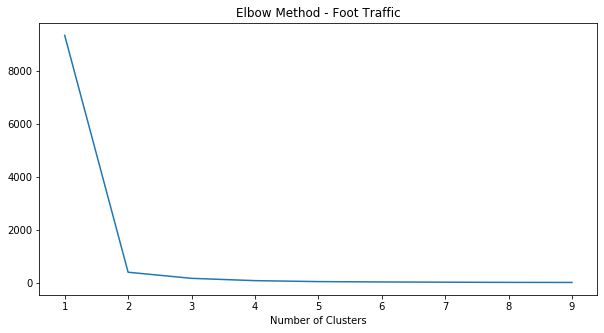

In [131]:
df_venues=galway_venues.groupby('Neighborhood').count().reset_index('Neighborhood')
venues=df_venues[['Venue Category']]

import warnings
warnings.filterwarnings('ignore')

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(venues)
    venues["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.title("Elbow Method - Foot Traffic")
plt.show()

In [69]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [70]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_venues[['Venue Category']])
df_venues['Venue Traffic Cluster'] = kmeans.predict(df_venues[['Venue Category']])
df = order_cluster('Venue Traffic Cluster', 'Venue Category',df_venues,True)
df.groupby('Venue Traffic Cluster')['Venue Category'].describe()

,count,mean,std,min,25%,50%,75%,max
Venue Traffic Cluster,,,,,,,,
0,17.0,1.882353,0.781213,1.0,1.00,2.0,2.00,3.0
1,22.0,5.227273,1.377777,4.0,4.00,5.0,6.00,9.0
2,2.0,14.500000,3.535534,12.0,13.25,14.5,15.75,17.0
3,1.0,100.000000,NaN,100.0,100.00,100.0,100.00,100.0


> From the elbow method, we identified the optimal value for k as 4. Performing the k-means clustering algorithm clusters the data into four groups. These clusters are then arranged based on their mean values. From the above table it is evident that the Cluster 3 is the most desirable as neighborhoods under this cluster has an average of 100 venues, whereas, Cluster 1 is the least desirable cluster with locations having almost two venues. The Final output is given below.

In [86]:
cluster_data = pd.merge(cluster_data,df[['Neighborhood','Venue Traffic Cluster']],on='Neighborhood', how='inner')
cluster_data

,Neighborhood,Latitude,Longitude,Venue Traffic Cluster
0,Ahascragh,53.397315,-8.332594,0
1,Ardrahan,53.156750,-8.805991,0
2,Athenry,53.299190,-8.746830,1
3,Ballinasloe,53.330272,-8.221376,1
4,Ballinderreen,53.186252,-8.908921,0
5,Ballyconneely,53.431491,-10.074751,0
6,Ballygar,53.522323,-8.326138,0
7,Barna,53.270434,-9.112482,1
8,Carna,53.324842,-9.835653,0
9,Casla,53.288519,-9.552989,0


<br><br><br><br>

## Clustering Based on Negative Venues

> As the next step, we categorize neighborhoods based on their locations. From the V. Business Requirements, it is clear that the neighborhoods should have pubs and bars and less number of restaurants. Therefore, we consider pubs and bars as Positive Venues and Restaurant categories as Negative Venues.

In [91]:
negative_venues=[]
positive_venues=[]
neighborhoods=cluster_data['Neighborhood']
for region in neighborhoods:
    temp_venues=galway_venues[galway_venues['Neighborhood']==region]
    temp_negative_venues=temp_venues[temp_venues['Venue Category'].str.contains('Restaurant')]
    negative_venues.append(len(temp_negative_venues))
    
    temp_positive_venues=temp_venues[temp_venues['Venue Category'].str.contains('Bar')]
    positive_venues.append(len(temp_positive_venues))
    
venue_data=pd.DataFrame(columns=['Neighborhood','Latitude','Longitude','Negative Venues','Positive Venues'])
venue_data['Neighborhood']=neighborhoods
venue_data['Latitude']=cluster_data['Latitude']
venue_data['Longitude']=cluster_data['Longitude']
venue_data['Negative Venues']= negative_venues
venue_data['Positive Venues']= positive_venues
venue_data

,Neighborhood,Latitude,Longitude,Negative Venues,Positive Venues
0,Ahascragh,53.397315,-8.332594,0,0
1,Ardrahan,53.156750,-8.805991,0,1
2,Athenry,53.299190,-8.746830,0,1
3,Ballinasloe,53.330272,-8.221376,2,0
4,Ballinderreen,53.186252,-8.908921,0,0
5,Ballyconneely,53.431491,-10.074751,0,1
6,Ballygar,53.522323,-8.326138,1,0
7,Barna,53.270434,-9.112482,0,0
8,Carna,53.324842,-9.835653,0,0
9,Casla,53.288519,-9.552989,0,0


In [133]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(venue_data[['Negative Venues']])
venue_data['Negative Venues Cluster'] = kmeans.predict(venue_data[['Negative Venues']])
df = order_cluster('Negative Venues Cluster', 'Negative Venues',venue_data,False)
df.groupby('Negative Venues Cluster')['Negative Venues'].describe()

,count,mean,std,min,25%,50%,75%,max
Negative Venues Cluster,,,,,,,,
0,1.0,22.000000,NaN,22.0,22.0,22.0,22.0,22.0
1,7.0,2.428571,0.534522,2.0,2.0,2.0,3.0,3.0
2,5.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
3,29.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


> From the clustering output, it is evident that Cluster 3 is most desirable as it comprises of locations that have no restaurants (mean=0), whereas, Cluster 1 is not profitable as it includes sites that have nearly 22 restaurants on an average. Therefore, our target neighborhoods are in Cluster 3. Given below is the output after clustering.

In [97]:
cluster_data['Negative Venues Cluster']=df['Negative Venues Cluster']
cluster_data

,Neighborhood,Latitude,Longitude,Venue Traffic Cluster,Negative Venues Cluster
0,Ahascragh,53.397315,-8.332594,0,3
1,Ardrahan,53.156750,-8.805991,0,3
2,Athenry,53.299190,-8.746830,1,3
3,Ballinasloe,53.330272,-8.221376,1,3
4,Ballinderreen,53.186252,-8.908921,0,3
5,Ballyconneely,53.431491,-10.074751,0,3
6,Ballygar,53.522323,-8.326138,0,3
7,Barna,53.270434,-9.112482,1,3
8,Carna,53.324842,-9.835653,0,3
9,Casla,53.288519,-9.552989,0,3


<br><br><br>

## Clustering Based on Positive Venues

In [100]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(venue_data[['Positive Venues']])
venue_data['Positive Venues Cluster'] = kmeans.predict(venue_data[['Positive Venues']])
df = order_cluster('Positive Venues Cluster', 'Positive Venues',venue_data,True)
df.groupby('Positive Venues Cluster')['Positive Venues'].describe()

,count,mean,std,min,25%,50%,75%,max
Positive Venues Cluster,,,,,,,,
0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3,2.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0


> Similarly, we cluster neighborhoods based on the number of favorable venues they have. Also, from the above output it is evident that Cluster 3 is most desirable as it comprises of locations that have the maximum number of favorable venues like pubs and bars, whereas, Cluster 0 has locations with no promising sites (mean=0)

In [101]:
cluster_data['Positive Venues Cluster']=df['Positive Venues Cluster']
cluster_data

,Neighborhood,Latitude,Longitude,Venue Traffic Cluster,Negative Venues Cluster,Positive Venues Cluster
0,Ahascragh,53.397315,-8.332594,0,3,0
1,Ardrahan,53.156750,-8.805991,0,3,0
2,Athenry,53.299190,-8.746830,1,3,0
3,Ballinasloe,53.330272,-8.221376,1,3,0
4,Ballinderreen,53.186252,-8.908921,0,3,0
5,Ballyconneely,53.431491,-10.074751,0,3,0
6,Ballygar,53.522323,-8.326138,0,3,0
7,Barna,53.270434,-9.112482,1,3,0
8,Carna,53.324842,-9.835653,0,3,0
9,Casla,53.288519,-9.552989,0,3,0


<br><br><br><br>

## Overall Score

> In the above sections, we have arranged the clusters in such a way that the most desirable group has the largest cluster label. In our case, it is Cluster 3. 
<br><br>As a next step, we compute an overall score by adding the cluster labels of Venue Traffic Cluster, Positive Venues Cluster and Negative Venues Cluster. We then segment them into low-value, mid-value and high-value neighborhoods. For instance, if a neighborhood is in Cluster 3 for all the clustering, the overall score will be 3+3+3 = 9. Therefore, the location is most suited for starting a restaurant. In our case, we obtained a maximum overall score of 6.


In [102]:
cluster_data['Overall Score']=cluster_data['Venue Traffic Cluster'] + cluster_data['Positive Venues Cluster'] + cluster_data['Negative Venues Cluster']
cluster_data.groupby('Overall Score')['Venue Traffic Cluster','Positive Venues Cluster','Negative Venues Cluster'].mean()

,Venue Traffic Cluster,Positive Venues Cluster,Negative Venues Cluster
Overall Score,,,
2,0.500000,0.500000,1.000000
3,0.176471,0.176471,2.647059
4,1.062500,0.250000,2.687500
5,1.000000,1.666667,2.333333
6,2.000000,1.500000,2.500000


In [103]:
cluster_data

,Neighborhood,Latitude,Longitude,Venue Traffic Cluster,Negative Venues Cluster,Positive Venues Cluster,Overall Score
0,Ahascragh,53.397315,-8.332594,0,3,0,3
1,Ardrahan,53.156750,-8.805991,0,3,0,3
2,Athenry,53.299190,-8.746830,1,3,0,4
3,Ballinasloe,53.330272,-8.221376,1,3,0,4
4,Ballinderreen,53.186252,-8.908921,0,3,0,3
5,Ballyconneely,53.431491,-10.074751,0,3,0,3
6,Ballygar,53.522323,-8.326138,0,3,0,3
7,Barna,53.270434,-9.112482,1,3,0,4
8,Carna,53.324842,-9.835653,0,3,0,3
9,Casla,53.288519,-9.552989,0,3,0,3


<br><br><br>

## Segmentation

> Based on the Overall Score, we segment neighborhoods into Low-value, Mid-value and High-value locations. Finally, we plot the locations based on their segments.

In [104]:
cluster_data['Segment'] = 'Low-Value'
cluster_data.loc[cluster_data['Overall Score']>3,'Segment'] = 'Mid-Value' 
cluster_data.loc[cluster_data['Overall Score']>4,'Segment'] = 'High-Value' 
cluster_data

,Neighborhood,Latitude,Longitude,Venue Traffic Cluster,Negative Venues Cluster,Positive Venues Cluster,Overall Score,Segment
0,Ahascragh,53.397315,-8.332594,0,3,0,3,Low-Value
1,Ardrahan,53.156750,-8.805991,0,3,0,3,Low-Value
2,Athenry,53.299190,-8.746830,1,3,0,4,Mid-Value
3,Ballinasloe,53.330272,-8.221376,1,3,0,4,Mid-Value
4,Ballinderreen,53.186252,-8.908921,0,3,0,3,Low-Value
5,Ballyconneely,53.431491,-10.074751,0,3,0,3,Low-Value
6,Ballygar,53.522323,-8.326138,0,3,0,3,Low-Value
7,Barna,53.270434,-9.112482,1,3,0,4,Mid-Value
8,Carna,53.324842,-9.835653,0,3,0,3,Low-Value
9,Casla,53.288519,-9.552989,0,3,0,3,Low-Value


In [135]:
cluster_data['Cluster Lable'] = 1
cluster_data.loc[cluster_data['Overall Score']>3,'Cluster Lable'] = 2 
cluster_data.loc[cluster_data['Overall Score']>4,'Cluster Lable'] = 3

In [139]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster_data['Latitude'], cluster_data['Longitude'], cluster_data['Neighborhood'], cluster_data['Cluster Lable']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<br><br><br>

## Examining Clusters

> Finally, we obtained the potential locations for setting up a new restaurant (marked as red in Figure 25). Further, we examine only the high-value neighborhoods to get a clear idea of the top venues.

In [119]:
galway_onehot = pd.get_dummies(galway_venues['Venue Category'], prefix="", prefix_sep="")
galway_onehot.head()

,Asian Restaurant,Auto Workshop,Bakery,Bar,Beach,Bed & Breakfast,Bistro,Boat or Ferry,Bookstore,Boxing Gym,...,Spanish Restaurant,Steakhouse,Supermarket,Tea Room,Theater,Tourist Information Center,Trail,Train Station,Vegetarian / Vegan Restaurant,Waste Facility
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
galway_onehot['Neighborhood']=galway_venues['Neighborhood']
print(galway_onehot.shape)

#Reordering columns to make 'Neighborhood_Name' the first column
fixed_columns = [galway_onehot.columns[-1]] + list(galway_onehot.columns[:-1])
galway_onehot = galway_onehot[fixed_columns]
galway_onehot.head()

(276, 84)


,Neighborhood,Asian Restaurant,Auto Workshop,Bakery,Bar,Beach,Bed & Breakfast,Bistro,Boat or Ferry,Bookstore,...,Spanish Restaurant,Steakhouse,Supermarket,Tea Room,Theater,Tourist Information Center,Trail,Train Station,Vegetarian / Vegan Restaurant,Waste Facility
0,Ahascragh,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ardrahan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ardrahan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ardrahan,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Athenry,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
df_grouped = galway_onehot.groupby('Neighborhood').mean().reset_index()
print(df_grouped.shape)
df_grouped

(42, 84)


,Neighborhood,Asian Restaurant,Auto Workshop,Bakery,Bar,Beach,Bed & Breakfast,Bistro,Boat or Ferry,Bookstore,...,Spanish Restaurant,Steakhouse,Supermarket,Tea Room,Theater,Tourist Information Center,Trail,Train Station,Vegetarian / Vegan Restaurant,Waste Facility
0,Ahascragh,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00,...,0.00,0.0,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.0
1,Ardrahan,0.00,0.0,0.000000,0.333333,0.0,0.000000,0.000000,0.0,0.00,...,0.00,0.0,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.0
2,Athenry,0.00,0.0,0.000000,0.250000,0.0,0.000000,0.000000,0.0,0.00,...,0.00,0.0,0.000000,0.0,0.00,0.000000,0.00,0.250000,0.000000,0.0
3,Ballinasloe,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00,...,0.00,0.0,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.0
4,Ballinderreen,0.00,0.5,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00,...,0.00,0.0,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.0
5,Ballyconneely,0.00,0.0,0.000000,0.500000,0.5,0.000000,0.000000,0.0,0.00,...,0.00,0.0,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.0
6,Ballygar,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00,...,0.00,0.0,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.0
7,Barna,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00,...,0.00,0.0,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.0
8,Carna,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00,...,0.00,0.0,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.0
9,Casla,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00,...,0.00,0.0,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.0


In [122]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [128]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df_grouped['Neighborhood']

for ind in np.arange(df_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

recommended_locations=cluster_data[cluster_data['Cluster Lable']==3]
recommended_locations=recommended_locations.Neighborhood.to_numpy()
recommended_locations=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Neighborhood'].isin(recommended_locations)]
recommended_locations

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Clifden,Bar,Pub,Restaurant,Café,Breakfast Spot,Fast Food Restaurant,Bakery,Harbor / Marina,Bed & Breakfast,Supermarket
21,Galway,Pub,Coffee Shop,Hotel,Café,Restaurant,Hostel,Italian Restaurant,Pizza Place,Bakery,Bookstore
38,Roundstone,Pub,Seafood Restaurant,Waste Facility,Construction & Landscaping,Department Store,Diner,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Flea Market
40,Tully,Farmers Market,Grocery Store,Waste Facility,French Restaurant,Diner,Fast Food Restaurant,Financial or Legal Service,Flea Market,Food & Drink Shop,Food Service
41,Tully Cross,Hotel,Pub,Bar,Bed & Breakfast,Gas Station,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Flea Market,Food & Drink Shop


<br><br>
> **Discussion** <br>In addition to the above methodology, the Foursquare API can be employed to further understand the top locations of the neighborhoods mentioned above and to drill down to one final location from the filtered set 5 neighborhoods.


> **Conclusion**<br>In real-time, the Foursquare API can be used to leverage the applications of location data for improving business or for promoting new opportunities like the one in this study.